# Movie Recommender 

For this recommender system I chose to use the MovieLens Small dataset.

## Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the data
from MovieLens latest small dataset

In [2]:

DATA_PATH = "data/ml-latest-small/"

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


ratings = pd.read_csv(DATA_PATH + 'ratings.csv')
movies = pd.read_csv(DATA_PATH + 'movies.csv')


Let's see how our data is distributed and check for missing values

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Unique users: 610, Unique movies: 9724

Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in

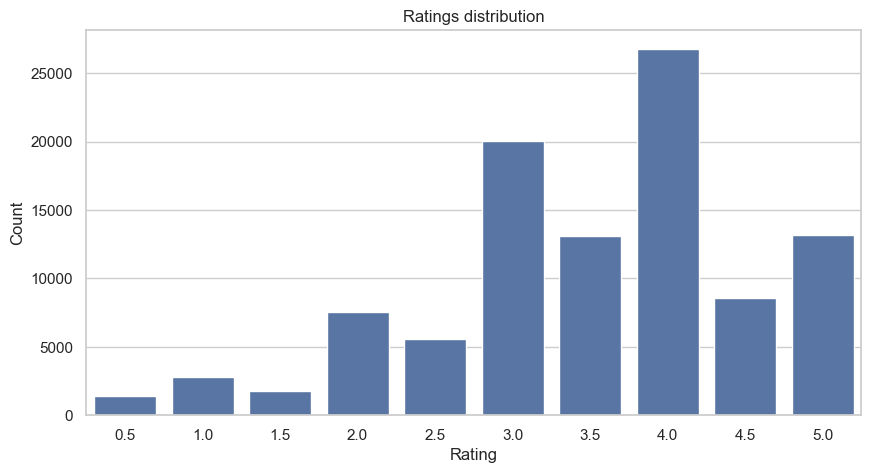

In [3]:

print("Ratings:")
print(ratings.head())

print("\nMovies:")
print(movies.head())

n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
print(f"\nUnique users: {n_users}, Unique movies: {n_movies}")

print("\nMissing values in ratings:")
print(ratings.isnull().sum())

print("\nMissing values in movies:")
print(movies.isnull().sum())

sns.countplot(x='rating', data=ratings)
plt.title("Ratings distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [4]:
df = pd.merge(ratings, movies, on="movieId")

In [5]:
df[:10]

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


Ratings distribution
   Rating  Count
0     0.5   1370
1     1.0   2811
2     1.5   1791
3     2.0   7551
4     2.5   5550
5     3.0  20047
6     3.5  13136
7     4.0  26818
8     4.5   8551
9     5.0  13211


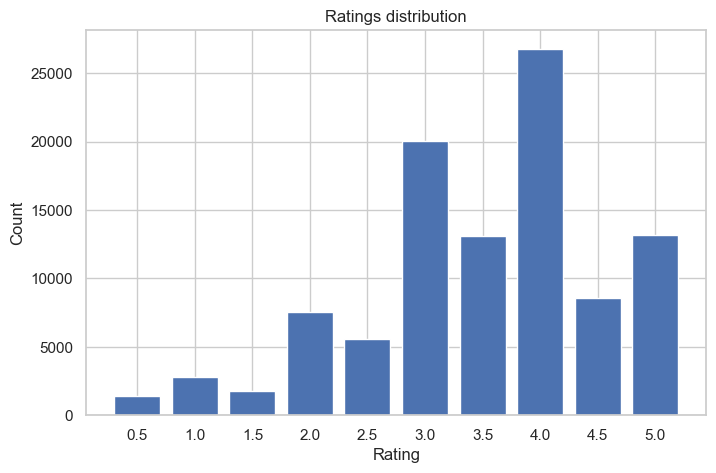

In [6]:
ratings_dist = ratings['rating'].value_counts().sort_index().reset_index()
ratings_dist.columns = ['Rating', 'Count']

print("Ratings distribution")
print(ratings_dist)


plt.figure(figsize=(8, 5))
plt.bar(ratings_dist['Rating'].astype(str), ratings_dist['Count'])
plt.title('Ratings distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [7]:
avg_rating_per_movie = df.groupby('title')['rating'].mean().reset_index(name='avg_rating')
print("\nAvarage rating per movie")
print(avg_rating_per_movie.head())




Avarage rating per movie
                                     title  avg_rating
0                               '71 (2014)         4.0
1  'Hellboy': The Seeds of Creation (2004)         4.0
2                   'Round Midnight (1986)         3.5
3                      'Salem's Lot (2004)         5.0
4                'Til There Was You (1997)         4.0



Rating counts
                                            title  rating_count
3158                          Forrest Gump (1994)           329
7593             Shawshank Redemption, The (1994)           317
6865                          Pulp Fiction (1994)           307
7680             Silence of the Lambs, The (1991)           279
5512                           Matrix, The (1999)           278
...                                           ...           ...
19                                10 Years (2011)             1
13                              1-900 (06) (1994)             1
12    00 Schneider - Jagd auf Nihil Baxter (1994)             1
10                      ...All the Marbles (1981)             1
7                            'night Mother (1986)             1

[9719 rows x 2 columns]


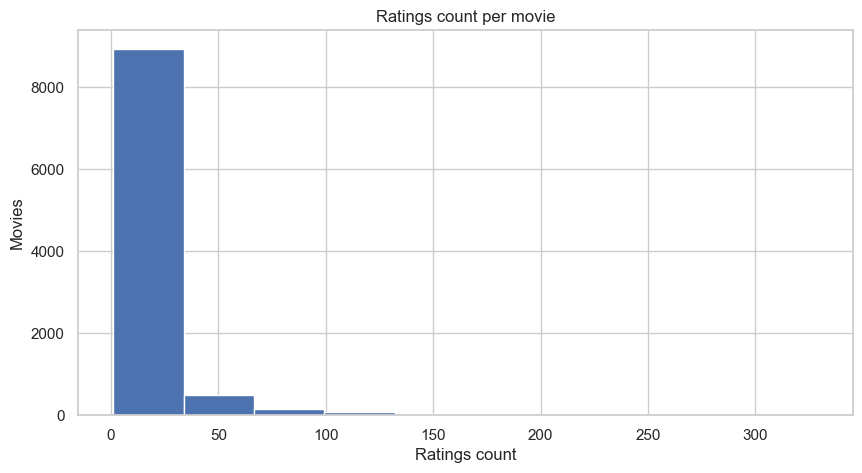

In [8]:

rating_counts = df.groupby('title')['rating'].count().reset_index(name='rating_count')
print("\nRating counts")
print(rating_counts.sort_values(by='rating_count', ascending=False))

plt.figure(figsize=(10, 5))
plt.hist(rating_counts['rating_count'])
plt.title('Ratings count per movie')
plt.xlabel('Ratings count')
plt.ylabel('Movies')
plt.show()



Avarage rating vs ratings count
                                            title  avg_rating  rating_count
3158                          Forrest Gump (1994)    4.164134           329
7593             Shawshank Redemption, The (1994)    4.429022           317
6865                          Pulp Fiction (1994)    4.197068           307
7680             Silence of the Lambs, The (1991)    4.161290           279
5512                           Matrix, The (1999)    4.192446           278
...                                           ...         ...           ...
19                                10 Years (2011)    3.500000             1
13                              1-900 (06) (1994)    4.000000             1
12    00 Schneider - Jagd auf Nihil Baxter (1994)    4.500000             1
10                      ...All the Marbles (1981)    2.000000             1
7                            'night Mother (1986)    3.000000             1

[9719 rows x 3 columns]


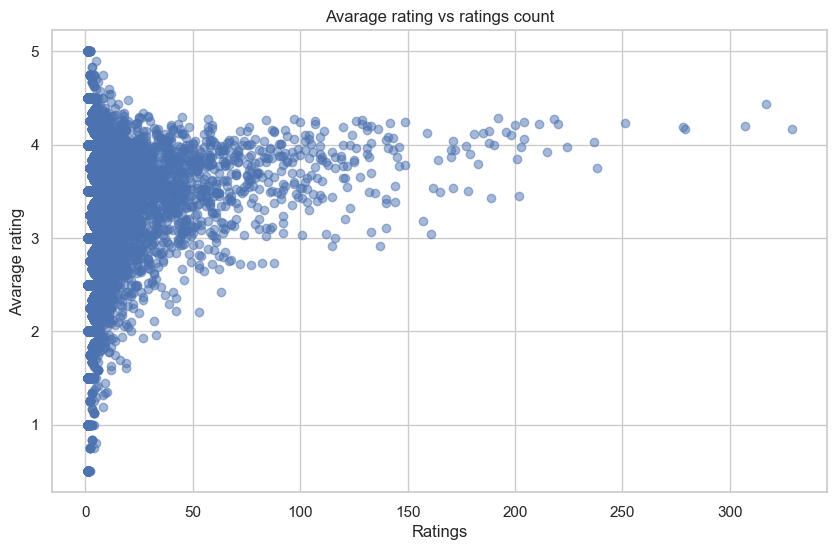

In [9]:
merged_stats = pd.merge(avg_rating_per_movie, rating_counts, on='title')
print("\nAvarage rating vs ratings count")
print(merged_stats.sort_values(by='rating_count', ascending=False))

plt.figure(figsize=(10, 6))
plt.scatter(merged_stats['rating_count'], merged_stats['avg_rating'], alpha=0.5)
plt.title('Avarage rating vs ratings count')
plt.xlabel('Ratings')
plt.ylabel('Avarage rating')
plt.show()



Ratings per user:
     userId  rating_count
0         1           232
1         2            29
2         3            39
3         4           216
4         5            44
..      ...           ...
605     606          1115
606     607           187
607     608           831
608     609            37
609     610          1302

[610 rows x 2 columns]


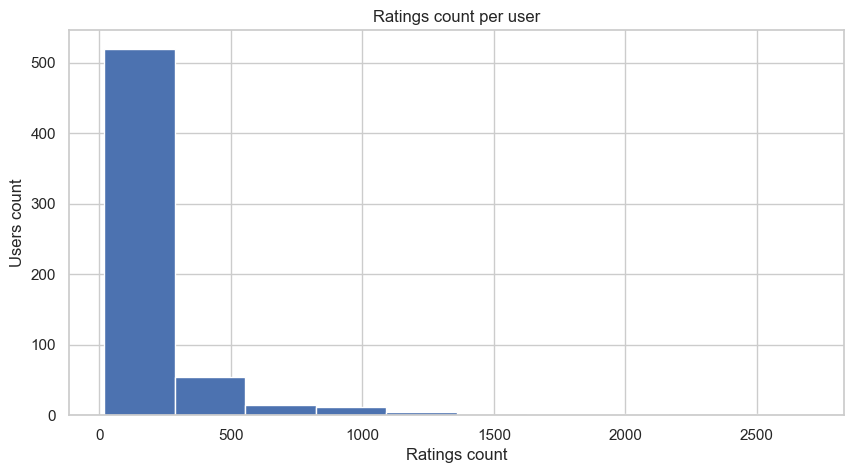

In [10]:
ratings_per_user = df.groupby('userId')['rating'].count().reset_index(name='rating_count')
print("\nRatings per user:")
print(ratings_per_user)

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_user['rating_count'])
plt.title('Ratings count per user')
plt.xlabel('Ratings count')
plt.ylabel('Users count')
plt.show()


Avarage rating per user:
     userId  avg_rating
0         1    4.366379
1         2    3.948276
2         3    2.435897
3         4    3.555556
4         5    3.636364
..      ...         ...
605     606    3.657399
606     607    3.786096
607     608    3.134176
608     609    3.270270
609     610    3.688556

[610 rows x 2 columns]


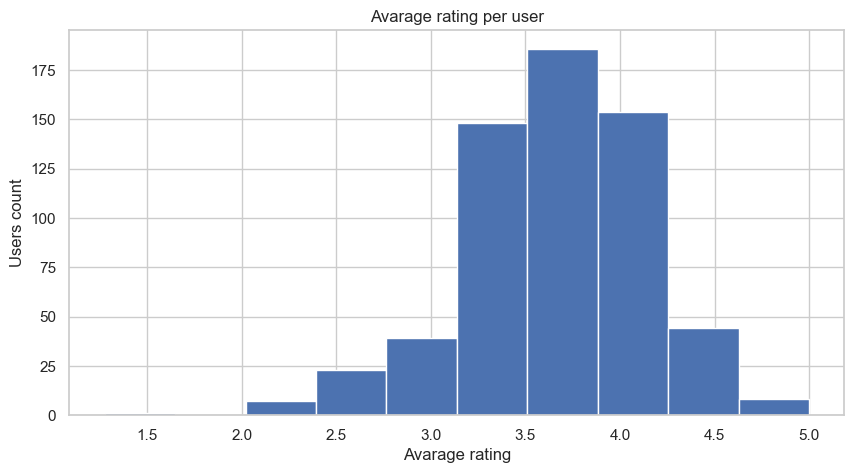

In [11]:
avg_rating_per_user = df.groupby('userId')['rating'].mean().reset_index(name='avg_rating')
print("\nAvarage rating per user:")
print(avg_rating_per_user)

plt.figure(figsize=(10, 5))
plt.hist(avg_rating_per_user['avg_rating'])
plt.title('Avarage rating per user')
plt.xlabel('Avarage rating')
plt.ylabel('Users count')
plt.show()


In [12]:
genre_counts = df['genres'].str.split('|').explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print("\nGenres count:")
print(genre_counts)


Genres count:
                 Genre  Count
0                Drama  41928
1               Comedy  39053
2               Action  30635
3             Thriller  26452
4            Adventure  24161
5              Romance  18124
6               Sci-Fi  17243
7                Crime  16681
8              Fantasy  11834
9             Children   9208
10             Mystery   7674
11              Horror   7291
12           Animation   6988
13                 War   4859
14                IMAX   4145
15             Musical   4138
16             Western   1930
17         Documentary   1219
18           Film-Noir    870
19  (no genres listed)     47


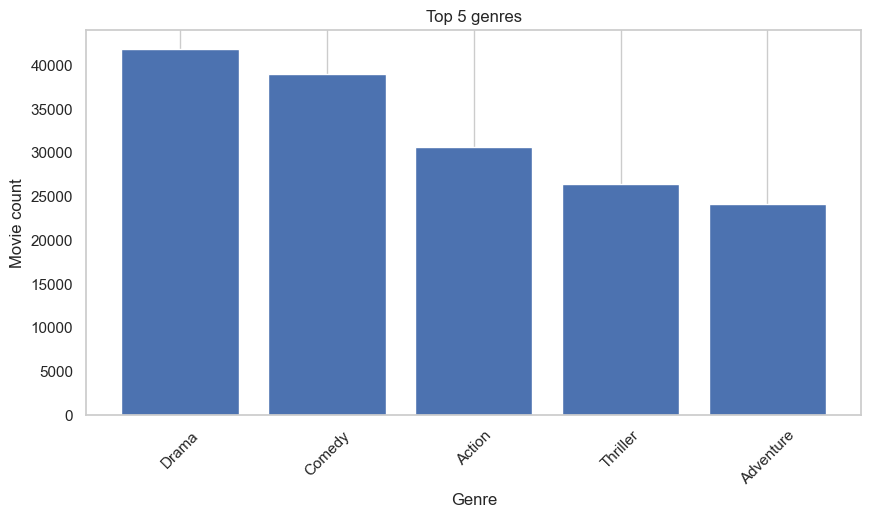

In [13]:
top_genres = genre_counts.head(5)
plt.bar(top_genres['Genre'], top_genres['Count'])
plt.title('Top 5 genres')
plt.xlabel('Genre')
plt.ylabel('Movie count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

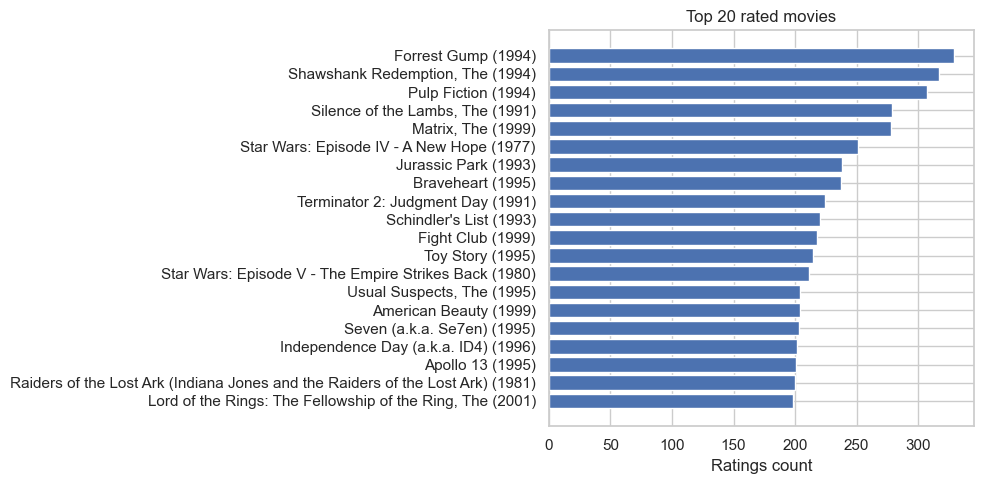

In [14]:
top_rated_movies = rating_counts.sort_values(by='rating_count', ascending=False).head(20)

plt.barh(top_rated_movies['title'][::-1], top_rated_movies['rating_count'][::-1])
plt.title('Top 20 rated movies')
plt.xlabel('Ratings count')
plt.tight_layout()
plt.show()

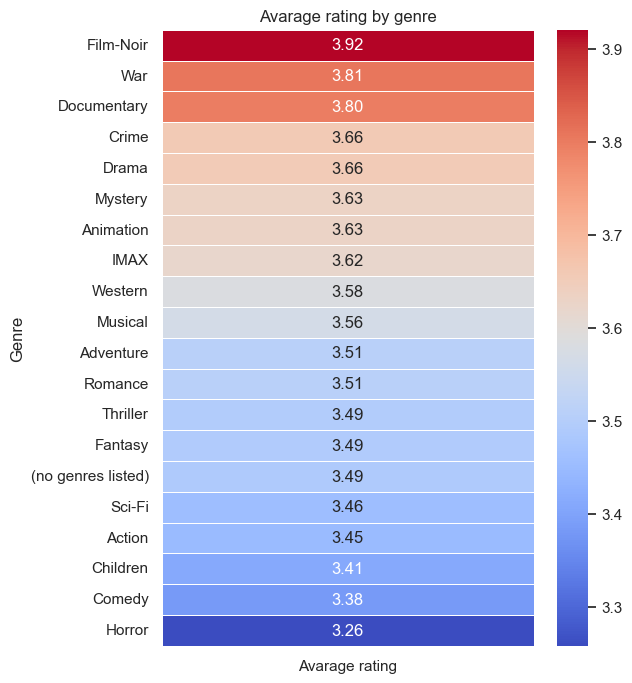

In [15]:
df_genres = df.copy()
df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

genre_avg = df_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_count = df_genres['genres'].value_counts()

genre_summary = pd.DataFrame({
    'Avarage rating': genre_avg,
    'Ratings count': genre_count
}).sort_values(by='Avarage rating', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(genre_summary[['Avarage rating']], annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Avarage rating by genre')
plt.ylabel('Genre')
plt.xlabel('')
plt.show()

In [19]:
# movie_years = df[['movieId', 'year']].drop_duplicates().groupby('year').count()

# plt.bar(movie_years.index, movie_years['movieId'])
# plt.title('Movies by year')
# plt.xlabel('Year')
# plt.ylabel('Movies count')
# plt.show()

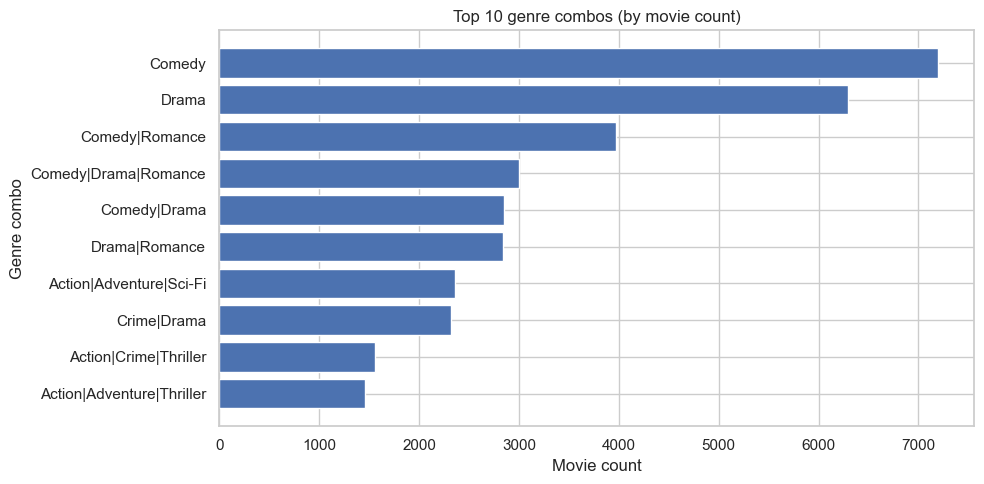

In [18]:
combo_counts = df['genres'].value_counts().head(10)

plt.barh(combo_counts.index[::-1], combo_counts.values[::-1])
plt.title('Top 10 genre combos (by movie count)')
plt.xlabel('Movie count')
plt.ylabel('Genre combo')
plt.tight_layout()
plt.show()

## Enrich movies data frame with description and cast

Since the original dataset contains only genres, let's add a description and cast to ensure more content for the content based recommender. 

*We will get that information from https://github.com/manfredmichael/movielens-details/blob/main/movielens100k_details.csv*

In [53]:
details_df = pd.read_csv('data/movielens100k_details.csv')
enriched_df = pd.merge(df, details_df[['movie_title', 'description', 'cast']], 
                         left_on='title', right_on='movie_title', how='left')

enriched_df.drop(columns=['movie_title'], inplace=True)
enriched_df = enriched_df.dropna(subset=['description'])
enriched_df = enriched_df.drop_duplicates(subset='title', keep='first')

enriched_df[['title', 'genres', 'description', 'cast']].head(20)

print(f"Number of movies in the new data frame (with description and cast): {enriched_df.shape[0]}")

enriched_df.to_csv('data/movies_with_description.csv')
print(f"Saved enriched_df to data/movies_with_description.csv")


Number of movies in the new data frame (with description and cast): 1152
Saved enriched_df to data/movies_with_description.csv


Finally, we need to split the datasets that we will use into **train**, **validation** and **test**

In [101]:
from sklearn.model_selection import train_test_split

# 80% train, 10% validation, 10% test
train_val_edf, test_edf = train_test_split(enriched_df, test_size=0.1, random_state=42)
train_edf, val_edf = train_test_split(train_val_edf, test_size=0.1111, random_state=42)  # 0.1111 * 0.9 = 0.1

train_df = train_edf.drop_duplicates(subset='title').reset_index(drop=True)
val_df = val_edf.drop_duplicates(subset='title').reset_index(drop=True)
test_df = test_edf.drop_duplicates(subset='title').reset_index(drop=True)

print(f"Enriched DF split; Train: {len(train_edf)}, Validation: {len(val_edf)}, Test: {len(test_edf)}")

Enriched DF split; Train: 920, Validation: 116, Test: 116


In [102]:
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.1111, random_state=42)

train_df = train_df.drop_duplicates(subset='title').reset_index(drop=True)
val_df = val_df.drop_duplicates(subset='title').reset_index(drop=True)
test_df = test_df.drop_duplicates(subset='title').reset_index(drop=True)

print(f"Movies DF split; Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")


Movies DF split; Train: 9336, Validation: 3864, Test: 3653


In [103]:
train_val_ratings, test_ratings = train_test_split(ratings, test_size=0.1, random_state=42)
train_ratings, val_ratings = train_test_split(train_val_ratings, test_size=0.1111, random_state=42)

print(f"Ratings split; Train: {len(train_ratings)}, Validation: {len(val_ratings)}, Test: {len(test_ratings)}")

Ratings split; Train: 80669, Validation: 10083, Test: 10084


## Content-based recommender 

### Variant 1. TF-IDF

#### By genre

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


genre_vectorizer = TfidfVectorizer(token_pattern=r'[^|]+')
genre_tfidf_train = genre_vectorizer.fit_transform(train_df['genres'])
train_df = train_df.reset_index(drop=True)

def recommend_by_genre(title, n=10):
    if title not in train_df['title'].values:
        return f"Movie '{title}' not found in the data."
    
    original_index = train_df[train_df['title'] == title].index[0]
    idx = train_df.index.get_loc(original_index)
    tfidf_vector = genre_tfidf_train[idx]
    
    # Cosine similarity only for one line
    sim_scores = cosine_similarity(tfidf_vector, genre_tfidf_train).flatten()
    sim_scores[idx] = -1 # to avoid showing the title itself in the recommendations
    
    sim_indices = sim_scores.argsort()[::-1][:n]
    
    return train_df[['title', 'genres']].iloc[sim_indices].reset_index(drop=True)



In [105]:
print(recommend_by_genre("Jurassic Park (1993)", n=5))
print(recommend_by_genre("Drunks (1995)", n=10))


                                  title                            genres
0              War of the Worlds (2005)  Action|Adventure|Sci-Fi|Thriller
1                  Clockstoppers (2002)  Action|Adventure|Sci-Fi|Thriller
2           Escape from New York (1981)  Action|Adventure|Sci-Fi|Thriller
3                          Spawn (1997)  Action|Adventure|Sci-Fi|Thriller
4  Road Warrior, The (Mad Max 2) (1981)  Action|Adventure|Sci-Fi|Thriller
                                               title genres
0                             Little Man Tate (1991)  Drama
1  That Obscure Object of Desire (Cet obscur obje...  Drama
2                                12 Angry Men (1957)  Drama
3                                       Rocky (1976)  Drama
4                                    I Am Sam (2001)  Drama
5                                  Doors, The (1991)  Drama
6                                         Ray (2004)  Drama
7  Entertaining Angels: The Dorothy Day Story (1996)  Drama
8               

#### By description

In [154]:
train_edf['description'] = train_edf['description'].fillna('').str.strip()

# Tf IDF on description. Might add cast later?
desc_vectorizer = TfidfVectorizer(stop_words='english')
desc_tfidf_train = desc_vectorizer.fit_transform(train_edf['description'])

def recommend_by_description(title, n=10):
    if title not in train_edf['title'].values:
        return f"Movie '{title}' not found in train_edf."

    original_index = train_edf[train_edf['title'] == title].index[0]
    idx = train_edf.index.get_loc(original_index)

    tfidf_vector = desc_tfidf_train[idx]
    sim_scores = cosine_similarity(tfidf_vector, desc_tfidf_train).flatten()
    sim_scores[idx] = -1  # remove the title again

    sim_indices = sim_scores.argsort()[::-1][:n]
    return train_edf[['title', 'description', 'genres', 'cast']].iloc[sim_indices].reset_index(drop=True)

Let's pick a movie from the train dataset to test the recommender by description

In [155]:
train_edf.head(10)

,userId,movieId,rating,timestamp,title,genres,description,cast,combined_features
6051,42,1468,2.0,996220933,Booty Call (1997),Comedy|Romance,Two friends who have gone too long without sex set out to get some.,"['Jamie Foxx', 'Tommy Davidson', 'Vivica A. Fox', 'Tamala Jones', 'Amy Monique Waddell', 'Wiley Moore', 'Kam Ray Chan', 'Ric Young', 'Ammie Sin', 'Scott LaR...","Comedy|Romance Two friends who have gone too long without sex set out to get some. ['Jamie Foxx', 'Tommy Davidson', 'Vivica A. Fox', 'Tamala Jones', 'Amy Mo..."
5097,33,580,1.0,939715414,Princess Caraboo (1994),Drama,"A mysterious young woman speaking a strange language shows up in an English village, where she is taken in by aristocrats who assume she is a foreign princess","['Phoebe Cates', 'Jim Broadbent', 'Wendy Hughes', 'Kevin Kline', 'John Lithgow', 'Stephen Rea', 'Peter Eyre', 'Jacqueline Pearce', 'Roger Lloyd Pack', 'John...","Drama A mysterious young woman speaking a strange language shows up in an English village, where she is taken in by aristocrats who assume she is a foreign ..."
1365,13,1639,4.0,987456818,Chasing Amy (1997),Comedy|Drama|Romance,"Holden and Banky are comic book artists. Everything's going good for them until they meet Alyssa, also a comic book artist. Holden falls for her, but his ho...","['Ben Affleck', 'Joey Lauren Adams', 'Ethan Suplee', 'Scott Mosier', 'Jason Lee', 'Casey Affleck', 'Dwight Ewell', 'Guinevere Turner', 'Carmen Llywelyn', 'B...","Comedy|Drama|Romance Holden and Banky are comic book artists. Everything's going good for them until they meet Alyssa, also a comic book artist. Holden fall..."
2571,19,1591,2.0,965704079,Spawn (1997),Action|Adventure|Sci-Fi|Thriller,"An elite mercenary is killed, but comes back from Hell as a reluctant soldier of the Devil.","['Michael Jai White', 'John Leguizamo', 'Martin Sheen', 'Theresa Randle', 'Nicol Williamson', 'D.B. Sweeney', 'Melinda Clarke', 'Miko Hughes', 'Sydni Beaudo...","Action|Adventure|Sci-Fi|Thriller An elite mercenary is killed, but comes back from Hell as a reluctant soldier of the Devil. ['Michael Jai White', 'John Leg..."
53,1,1029,5.0,964982855,Dumbo (1941),Animation|Children|Drama|Musical,"Ridiculed because of his enormous ears, a young circus elephant is assisted by a mouse to achieve his full potential.","['Sterling Holloway', 'Edward Brophy', 'Herman Bing', 'Billy Bletcher', 'Hall Johnson Choir', 'Cliff Edwards', 'Verna Felton', 'Noreen Gammill', 'Eddie Hold...","Animation|Children|Drama|Musical Ridiculed because of his enormous ears, a young circus elephant is assisted by a mouse to achieve his full potential. ['Ste..."
31013,217,444,2.0,955945239,Even Cowgirls Get the Blues (1993),Comedy|Romance,"Sissy Hankshaw (Uma Thurman) is born with enormous thumbs that help her hitchhiking through the U.S. from a young age. She becomes a model in advertising, a...","['Uma Thurman', 'Lorraine Bracco', 'Pat Morita', 'Angie Dickinson', 'Keanu Reeves', 'John Hurt', 'Rain Phoenix', 'Ed Begley Jr.', 'Carol Kane', 'Sean Young'...",Comedy|Romance Sissy Hankshaw (Uma Thurman) is born with enormous thumbs that help her hitchhiking through the U.S. from a young age. She becomes a model in...
5130,33,1399,2.0,939716472,Marvin's Room (1996),Drama,"After seventeen years, a fiercely independent woman and her rebellious son return home and together they turn the family she left behind upside down.","['Meryl Streep', 'Leonardo DiCaprio', 'Diane Keaton', 'Robert De Niro', 'Hume Cronyn', 'Gwen Verdon', 'Hal Scardino', 'Dan Hedaya', 'Margo Martindale', 'Cyn...","Drama After seventeen years, a fiercely independent woman and her rebellious son return home and together they turn the family she left behind upside down. ..."
2301,19,107,2.0,965706886,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,The Muppets' twist on the classic tale.,"['Tim Curry', 'Billy Connolly', 'Jennifer Saunders', 'Kevin Bishop', 'Dave Goelz', 'Steve Whitmire', 'Jerry Nelson', 'Kevin Clash', 'Bill Barrett

In [166]:
test_movies = train_edf.head(5)

def show_recommendations(test_movies, recommend_func):
    for title in test_movies['title']:
        print(f"\n*** {title} ***")
        
        desc = train_edf.loc[train_edf['title'] == title, 'description'].values[0]
        genres = train_edf.loc[train_edf['title'] == title, 'genres'].values[0]
        cast = train_edf.loc[train_edf['title'] == title, 'cast'].values[0]
        print(f"Description: {desc}\nGenres: {genres}\n  Cast: {cast}\n")
        
        recs = recommend_func(title, n=5)
        print("~~~Top 5 similar films by description:~~~")
        for i, row in recs.iterrows():
            print(f"- {row['title']}\n  Description: {row['description']}\n  Genres: {row['genres']}\n Cast: {row['cast']}\n")


In [167]:
show_recommendations(test_movies, recommend_by_description)


*** Booty Call (1997) ***
Description: Two friends who have gone too long without sex set out to get some.
Genres: Comedy|Romance
  Cast: ['Jamie Foxx', 'Tommy Davidson', 'Vivica A. Fox', 'Tamala Jones', 'Amy Monique Waddell', 'Wiley Moore', 'Kam Ray Chan', 'Ric Young', 'Ammie Sin', 'Scott LaRose', 'Bernie Mac', 'Olivia Yap', 'Bill MacDonald', 'John Moraitis', 'Karen Robinson', 'Donna Preising', 'Johnie Chase', 'Amanda Tapping']

~~~Top 5 similar films by description:~~~
- Fled (1996)
  Description: Two prisoners chained together flee during an escape attempt gone bad.
  Genres: Action|Adventure
 Cast: ['Laurence Fishburne', 'Stephen Baldwin', 'Will Patton', 'Robert John Burke', 'Robert Hooks', 'Victor Rivers', 'David Dukes', 'Ken Jenkins', 'Michael Nader', 'Brittney Powell', 'Salma Hayek', 'Steve Carlisle', 'Brett Rice', 'J. Don Ferguson', 'Kathy Payne', 'Robert Apisa', 'Gary Yates', 'Jon Huffman']

- When Harry Met Sally... (1989)
  Description: Harry and Sally have known each other

#### By description, genre and cast

In [158]:
train_edf['description'] = train_edf['description'].fillna('').str.strip()
train_edf['cast'] = train_edf['cast'].fillna('').str.strip()
train_edf['genres'] = train_edf['genres'].fillna('').replace('(no genres listed)', '').str.strip()

train_edf['combined_features'] = (
    train_edf['genres'] + ' ' +
    train_edf['description'] + ' ' +
    train_edf['cast']
)


combo_vectorizer = TfidfVectorizer(stop_words='english')
combo_tfidf_train = combo_vectorizer.fit_transform(train_edf['combined_features'])

In [160]:
def recommend_by_all_features(title, n=10):
    if title not in train_edf['title'].values:
        return f"Movie '{title}' not found in train_edf."

    original_index = train_edf[train_edf['title'] == title].index[0]
    idx = train_edf.index.get_loc(original_index)

    tfidf_vector = combo_tfidf_train[idx]
    sim_scores = cosine_similarity(tfidf_vector, combo_tfidf_train).flatten()
    sim_scores[idx] = -1 

    sim_indices = sim_scores.argsort()[::-1][:n]
    return train_edf[['title', 'genres', 'description', 'cast']].iloc[sim_indices].reset_index(drop=True)


In [161]:
show_recommendations(test_movies, recommend_by_all_features)



*** Booty Call (1997) ***
Description: Two friends who have gone too long without sex set out to get some.
Genres: Comedy|Romance

Top 5 similar films by description:
- Soul Food (1997)
  Description: One person can keep a family together and, when that one person is gone, a family can be torn apart.
  Genres: Drama
  Cast: ['Vanessa Williams', 'Vivica A. Fox', 'Nia Long', 'Michael Beach', 'Mekhi Phifer', 'Brandon Hammond', 'Jeffrey D. Sams', 'Gina Ravera', 'Irma P. Hall', 'Carl Wright', 'Mel Jackson', 'Morgan Méchelle Smith', 'John M. Watson Sr.', 'M.T. Alexander', 'Lawrence Petty', 'Marcia Wright', 'Bernard Mixon', 'Hamp Clemons']

- B*A*P*S (1997)
  Description: Two tacky homegirls move to L.A. to become dancers; instead they scam a dying millionaire but eventually become B*A*P*S (Black American Princesses).
  Genres: Comedy
  Cast: ['Halle Berry', 'Natalie Desselle Reid', 'Martin Landau', 'Ian Richardson', 'Troy Byer', 'Luigi Amodeo', 'Jonathan Fried', 'Pierre Edwards', 'Anthony J